# 3 Features Models - Sri Casper

In [9]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Data Modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from imblearn.over_sampling import SMOTE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xg
from sklearn.ensemble import GradientBoostingRegressor

import warnings
warnings.filterwarnings('ignore')

# Model Evaluation
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import r2_score as r2
from sklearn.metrics import explained_variance_score

In [3]:
# Get the data from .csv files
# Assign the file to 'prop_2016_cleaned' and 'prop_2017_cleaned'

p_2016 = pd.read_csv('prop_2016_cleaned.csv')
p_2017 = pd.read_csv('prop_2017_cleaned.csv')

In [4]:
# Shape of the dataset

p_2016.shape

(29852, 24)

In [91]:
p_2016['assessedvalue'].median()

303250.0

## Data Preprocessing

In [6]:
# Instantiate the independent and dependent variables 

# Independent variables / features
X = prop_2016_cleaned[['bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet']]

# Dependent variable / target
y = prop_2016_cleaned['assessedvalue']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size = 0.3, 
                                                    random_state = 1)

In [7]:
# Shape of the features

X_train.shape

(20896, 3)

In [8]:
# Shape of the target

y_train.shape

(20896,)

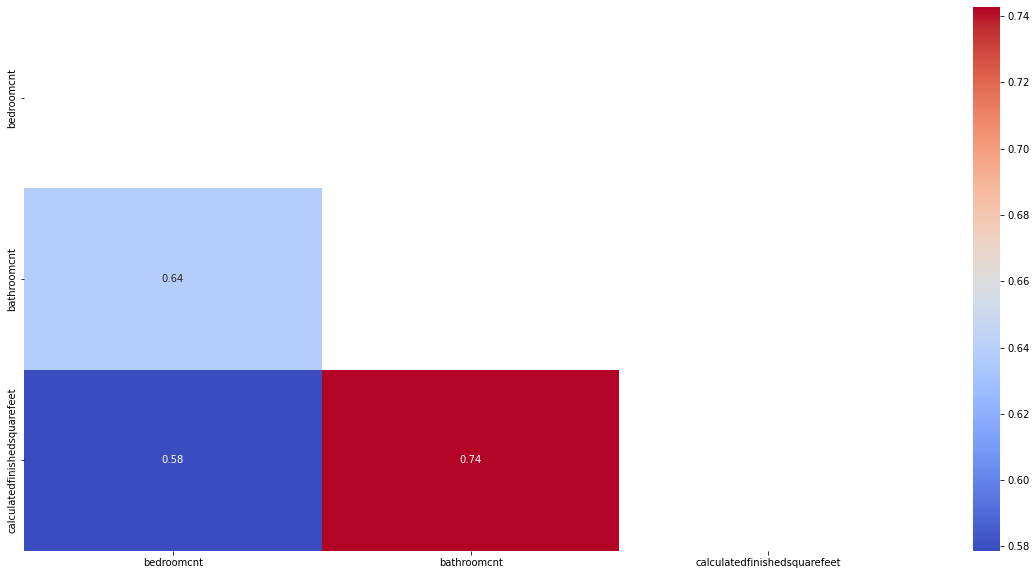

In [20]:
# Correlation of the variables in a heatmap

plt.figure(figsize=(20, 10))
matrix = np.triu(X.corr())
sns.heatmap(X.corr(), annot=True, mask=matrix, cmap='coolwarm')
plt.show()

<Axes: >

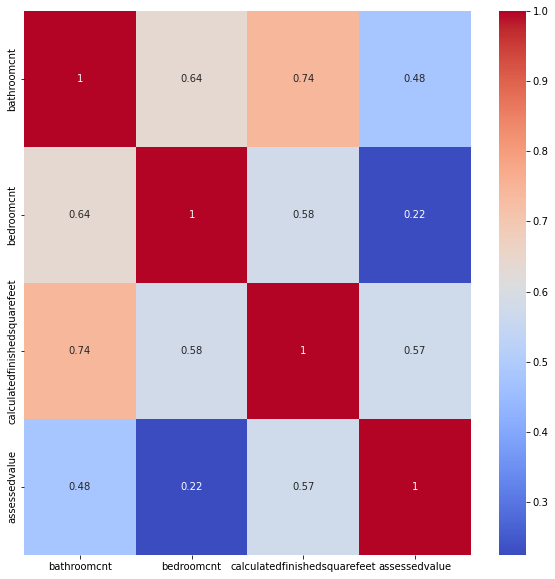

In [28]:
plt.figure(figsize = (10,10))
columns = ['bathroomcnt',
 'bedroomcnt',
 'calculatedfinishedsquarefeet',
 'assessedvalue']
sns.heatmap(prop_2016_cleaned[columns].corr(), annot = True, cmap='coolwarm')

In [26]:
y_corr = p_2016.corr()
y_corr['assessedvalue'].sort_values()

ageinyear                      -0.159805
latitude                       -0.058159
propertylandusetypeid          -0.054284
longitude                      -0.040742
buildingqualitytypeid          -0.029635
regionidcity                   -0.027171
regionidcounty                 -0.023523
assessmentyear                 -0.018094
lotsizesquarefeet               0.011730
regionidzip                     0.026091
unitcnt                         0.027667
parcelid                        0.151226
yearbuilt                       0.159407
bedroomcnt                      0.224450
roomcnt                         0.330279
fullbathcnt                     0.457647
bathroomcnt                     0.477159
calculatedfinishedsquarefeet    0.573069
finishedsquarefeet12            0.588797
structuretaxvaluedollarcnt      0.870541
taxamount                       0.954803
landtaxvaluedollarcnt           0.960358
taxvaluedollarcnt               0.999737
assessedvalue                   1.000000
Name: assessedva

## Linear Regression

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
# Linear regression

# Instantiate model
lr_model = LinearRegression()

# Fit model
lr_model.fit(X_train, y_train)
predict_lr = lr_model.predict(X_test)

# Score model
lr_score_train = lr_model.score(X_train,y_train)
lr_score = lr_model.score(X_test, y_test)
exp_lr = explained_variance_score(predict_lr, y_test)

# Evaluate model
lr_r2mse = r2(y_test, predict_lr)
lr_mse = MSE(y_test, predict_lr)
lr_mae = MAE(y_test, predict_lr)

In [13]:
# Print the results

print(f"Train score: {lr_score_train}")
print(f"Test score: {lr_score}")
print(f"EV score: {exp_lr}")
print(f"Rsquare: {lr_r2mse}")
print(f"MSE: {lr_mse}")
print(f"MAE: {lr_mae}")

Train score: 0.3596526878121017
Test score: 0.37179494603377516
EV score: -0.5448408544357028
Rsquare: 0.37179494603377516
RMSE: 270035529059.34485
MAE: 222795.88702054997


In [72]:
predict_model_lr = lr_model.predict([[2,2,1500]])
predict_model_lr

array([436308.33521155])

## Lasso Regression

In [29]:
# Lasso regression

# Instantiate model
ls_model = Lasso()

# Fit model
ls_model.fit(X_train, y_train)
predict_ls = ls_model.predict(X_test)

# Score model
ls_score_train = ls_model.score(X_train,y_train)
ls_score = ls_model.score(X_test, y_test)
exp_ls = explained_variance_score(predict_ls, y_test)

# Evaluate model
ls_r2mse = r2(y_test, predict_ls)
ls_mse = MSE(y_test, predict_ls)
ls_mae = MAE(y_test, predict_ls)

In [30]:
# Print the results

print(f"Train score: {ls_score_train}")
print(f"Test score: {ls_score}")
print(f"EV score: {exp_ls}")
print(f"Rsquare: {ls_r2mse}")
print(f"MSE: {ls_mse}")
print(f"MAE: {ls_mae}")

Train score: 0.359652687797434
Test score: 0.371794435342804
EV score: -0.5448448986491632
Rsquare: 0.371794435342804
MSE: 270035748581.14868
MAE: 222795.50263200398


In [31]:
# Lasso regression

# Instantiate model
ls_model = Lasso(alpha = 0.1)

# Fit model
ls_model.fit(X_train, y_train)
predict_ls = ls_model.predict(X_test)

# Score model
ls_score_train = ls_model.score(X_train,y_train)
ls_score = ls_model.score(X_test, y_test)
exp_ls = explained_variance_score(predict_ls, y_test)

# Evaluate model
ls_r2mse = r2(y_test, predict_ls)
ls_mse = MSE(y_test, predict_ls)
ls_mae = MAE(y_test, predict_ls)

In [32]:
# Print the results

print(f"Train score: {ls_score_train}")
print(f"Test score: {ls_score}")
print(f"EV score: {exp_ls}")
print(f"Rsquare: {ls_r2mse}")
print(f"MSE: {ls_mse}")
print(f"MAE: {ls_mae}")

Train score: 0.35965268781195636
Test score: 0.37179489528281406
EV score: -0.5448412576114592
Rsquare: 0.37179489528281406
MSE: 270035550874.77368
MAE: 222795.8487772678


In [33]:
from sklearn.linear_model import LassoCV

#Lasso Cross validation
lasso_cv = LassoCV(alphas = [0.0001, 0.001,0.01, 0.1, 1, 10], random_state=0).fit(X_train, y_train)


#score
print(lasso_cv.score(X_train, y_train))
print(lasso_cv.score(X_test, y_test))

0.3596526878121017
0.3717949460636203


## Ridge Regression

In [34]:
from sklearn.linear_model import Ridge

In [35]:
# Ridge regression

# Instantiate model
rd_model = Ridge()

# Fit model
rd_model.fit(X_train, y_train)
predict_rd = rd_model.predict(X_test)

# Score model
rd_score_train = rd_model.score(X_train,y_train)
rd_score = rd_model.score(X_test, y_test)
exp_rd = explained_variance_score(predict_rd, y_test)

# Evaluate model
rd_r2mse = r2(y_test, predict_rd)
rd_mse = MSE(y_test, predict_rd)
rd_mae = MAE(y_test, predict_rd)

In [36]:
# Print the results

print(f"Train score: {rd_score_train}")
print(f"Test score: {rd_score}")
print(f"EV score: {exp_rd}")
print(f"Rsquare: {rd_r2mse}")
print(f"MSE: {rd_mse}")
print(f"MAE: {rd_mae}")

Train score: 0.3596526873753556
Test score: 0.3717922331138903
EV score: -0.5448637452441216
Rsquare: 0.3717922331138903
MSE: 270036695214.80917
MAE: 222793.79685809885


## Decision Tree

In [38]:
from sklearn.tree import DecisionTreeRegressor

In [39]:
# Decision Tree

# Instantiate model
dtr_model = DecisionTreeRegressor(random_state = 0)

# Fit model
dtr_model.fit(X_train,y_train)
predict_dtr = dtr_model.predict(X_test)

# Score model
dtr_score_train = dtr_model.score(X_train,y_train)
dtr_score=dtr_model.score(X_test,y_test)
exp_dtr = explained_variance_score(predict_dtr,y_test)

# Evaluate model
dtr_r2mse = r2(y_test, predict_dtr)
dtr_mse = MSE(y_test, predict_dtr)
dtr_mae = MAE(y_test, predict_dtr)

In [40]:
# Print the results

print(f"Train score: {dtr_score_train}")
print(f"Test score: {dtr_score}")
print(f"EV score: {exp_dtr}")
print(f"Rsquare: {dtr_r2mse}")
print(f"MSE: {dtr_mse}")
print(f"MAE: {dtr_mae}")

Train score: 0.9462933956014548
Test score: 0.1484869190092939
EV score: 0.261634487008789
Rsquare: 0.1484869190092939
MSE: 366025048468.7133
MAE: 261571.6670187213


In [45]:
from sklearn.tree import plot_tree

In [46]:
# Plot tree

plot_tree(dtr_model, 
          feature_names=X.columns, 
          rounded=True,
          impurity=True,
          filled=True,
          fontsize=8);

Error in callback <function flush_figures at 0x7f7a70742430> (for post_execute):


KeyboardInterrupt: 

#### max_depth=2

In [41]:
# Decision Tree

# Instantiate model
dtr_model_2 = DecisionTreeRegressor(max_depth = 2, random_state = 0)

# Fit model
dtr_model_2.fit(X_train,y_train)
predict_dtr_2 = dtr_model_2.predict(X_test)

# Score model
dtr_score_train_2 = dtr_model_2.score(X_train,y_train)
dtr_score_2 = dtr_model_2.score(X_test,y_test)
exp_dtr_2 = explained_variance_score(predict_dtr_2,y_test)

# Evaluate model
dtr_r2mse_2 = r2(y_test, predict_dtr_2)
dtr_mse_2 = MSE(y_test, predict_dtr_2)
dtr_mae_2 = MAE(y_test, predict_dtr_2)

In [42]:
# Print the results

print(f"Train score: {dtr_score_train_2}")
print(f"Test score: {dtr_score_2}")
print(f"EV score: {exp_dtr_2}")
print(f"Rsquare: {dtr_r2mse_2}")
print(f"MSE: {dtr_mse_2}")
print(f"MAE: {dtr_mae_2}")

Train score: 0.37494141816355553
Test score: 0.34874575498674587
EV score: -0.8188905225671261
Rsquare: 0.34874575498674587
MSE: 279943282044.5813
MAE: 236132.92348049112


#### max_depth=5

In [43]:
# Decision Tree

# Instantiate model
dtr_model_5 = DecisionTreeRegressor(max_depth = 5, random_state = 0)

# Fit model
dtr_model_5.fit(X_train,y_train)
predict_dtr_5 = dtr_model_5.predict(X_test)

# Score model
dtr_score_train_5 = dtr_model_5.score(X_train,y_train)
dtr_score_5 = dtr_model_5.score(X_test,y_test)
exp_dtr_5 = explained_variance_score(predict_dtr_5,y_test)

# Evaluate model
dtr_r2mse_5 = r2(y_test, predict_dtr_5)
dtr_mse_5 = MSE(y_test, predict_dtr_5)
dtr_mae_5 = MAE(y_test, predict_dtr_5)

In [44]:
# Print the results

print(f"Train score: {dtr_score_train_5}")
print(f"Test score: {dtr_score_5}")
print(f"EV score: {exp_dtr_5}")
print(f"Rsquare: {dtr_r2mse_5}")
print(f"MSE: {dtr_mse_5}")
print(f"MAE: {dtr_mae_5}")

Train score: 0.5761694667171581
Test score: 0.45594974207931593
EV score: 0.1881987226256796
Rsquare: 0.45594974207931593
MSE: 233861377435.5016
MAE: 209105.06419925182


## Random Forests

In [48]:
from sklearn.ensemble import RandomForestRegressor

In [49]:
# Random Forests

# Instantiate model
# default n_estimators = 100
rf_model = RandomForestRegressor(random_state = 0)

# Fit model
rf_model.fit(X_train,y_train)
predict_rf = rf_model.predict(X_test)

# Score model
rf_score_train = rf_model.score(X_train,y_train)
rf_score = rf_model.score(X_test,y_test)
exp_rf = explained_variance_score(predict_rf, y_test)

# Evaluate model
rf_r2mse = r2(y_test, predict_rf)
rf_mse = MSE(y_test, predict_rf)
rf_mae = MAE(y_test, predict_rf)

In [50]:
# Print the results

print(f"Train score: {rf_score_train}")
print(f"Test score: {rf_score}")
print(f"EV score: {exp_rf}")
print(f"Rsquare: {rf_r2mse}")
print(f"RMSE: {rf_mse}")
print(f"MAE: {rf_mae}")

Train score: 0.8678002013714097
Test score: 0.45952487115833374
EV score: 0.12580000379446488
Rsquare: 0.45952487115833374
RMSE: 232324599171.44144
MAE: 226405.46563268465


In [76]:
p_2016.head()

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,finishedsquarefeet12,fullbathcnt,latitude,longitude,lotsizesquarefeet,...,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,ageinyear,assessedvalue
0,14165040,3.5,6,4,2774.0,2774.0,3,33895719.0,-117810249.0,9120.0,...,7.0,4.0,1970,189508.0,836076.0,2015,646568.0,9576.18,46,836076.0
1,12144802,2.0,4,4,1818.0,1818.0,2,34112701.0,-118049425.0,9917.0,...,7.0,1.0,1956,377159.0,1288959.0,2015,911800.0,14923.87,60,1288959.0
2,13101491,3.0,4,4,2509.0,2509.0,3,33983059.0,-117853204.0,13390.0,...,8.0,1.0,1981,281659.0,375590.0,2015,93931.0,4616.34,35,375590.0
3,13926960,2.0,3,7,1619.0,1619.0,2,33793770.0,-118078964.0,7700.0,...,5.0,2.0,1959,47244.0,77844.0,2015,30600.0,1500.44,57,77844.0
4,13980106,2.5,4,7,1976.0,1976.0,2,33634633.0,-117898743.0,7205.0,...,7.0,1.5,1954,102352.0,854126.0,2015,751774.0,9465.60,62,854126.0


In [71]:
predict_model = rf_model.predict([[2,2,1500]])
predict_model

array([159602.078])

In [73]:
predict_model = rf_model.predict([[2,2,3000]])
predict_model

array([1052660.17])

In [75]:
predict_model = rf_model.predict([[2,2,3000]])
predict_model

array([1052660.17])

In [74]:
predict_model = rf_model.predict([[3,3,3000]])
predict_model

array([1013430.33])

#### n_estimators = 20

In [51]:
# Random Forests

# Instantiate model
rf_model_20 = RandomForestRegressor(n_estimators = 20,random_state = 0)

# Fit model
rf_model_20.fit(X_train,y_train)
predict_rf_20 = rf_model_20.predict(X_test)

# Score model
rf_score_train_20 = rf_model_20.score(X_train,y_train)
rf_score_20 = rf_model_20.score(X_test,y_test)
exp_rf_20 = explained_variance_score(predict_rf_20, y_test)

# Evaluate model
rf_r2mse_20 = r2(y_test, predict_rf_20)
rf_mse_20 = MSE(y_test, predict_rf_20)
rf_mae_20 = MAE(y_test, predict_rf_20)

In [52]:
# Print the results

print(f"Train score: {rf_score_train_20}")
print(f"Test score: {rf_score_20}")
print(f"EV score: {exp_rf_20}")
print(f"Rsquare: {rf_r2mse_20}")
print(f"RMSE: {rf_mse_20}")
print(f"MAE: {rf_mae_20}")

Train score: 0.8588625516249613
Test score: 0.44168664556195847
EV score: 0.04672888205448045
Rsquare: 0.44168664556195847
RMSE: 239992405496.75656
MAE: 228258.57317487823


#### n_estimators = 50

In [55]:
# Random Forests

# Instantiate model
rf_model_50 = RandomForestRegressor(n_estimators = 50,random_state = 0)

# Fit model
rf_model_50.fit(X_train,y_train)
predict_rf_50 = rf_model_50.predict(X_test)

# Score model
rf_score_train_50 = rf_model_50.score(X_train,y_train)
rf_score_50 = rf_model_50.score(X_test,y_test)
exp_rf_50 = explained_variance_score(predict_rf_50, y_test)

# Evaluate model
rf_r2mse_50 = r2(y_test, predict_rf_50)
rf_mse_50 = MSE(y_test, predict_rf_50)
rf_mae_50 = MAE(y_test, predict_rf_50)

In [56]:
# Print the results

print(f"Train score: {rf_score_train_50}")
print(f"Test score: {rf_score_50}")
print(f"EV score: {exp_rf_50}")
print(f"Rsquare: {rf_r2mse_50}")
print(f"MSE: {rf_mse_50}")
print(f"MAE: {rf_mae_50}")

Train score: 0.863262822881362
Test score: 0.456272444780649
EV score: 0.10244472161111351
Rsquare: 0.456272444780649
MSE: 233722662864.30676
MAE: 226921.34486168178


#### n_estimators = 500

In [68]:
# Random Forests

# Instantiate model
rf_model_500 = RandomForestRegressor(n_estimators = 500,random_state = 0)

# Fit model
rf_model_500.fit(X_train,y_train)
predict_rf_500 = rf_model_500.predict(X_test)

# Score model
rf_score_train_500 = rf_model_500.score(X_train,y_train)
rf_score_500 = rf_model_500.score(X_test,y_test)
exp_rf_500 = explained_variance_score(predict_rf_500, y_test)

# Evaluate model
rf_r2mse_500 = r2(y_test, predict_rf_500)
rf_mse_500 = MSE(y_test, predict_rf_500)
rf_mae_500 = MAE(y_test, predict_rf_500)

In [69]:
# Print the results

print(f"Train score: {rf_score_train_500}")
print(f"Test score: {rf_score_500}")
print(f"EV score: {exp_rf_500}")
print(f"Rsquare: {rf_r2mse_500}")
print(f"MSE: {rf_mse_500}")
print(f"MAE: {rf_mae_500}")

Train score: 0.8696824049705425
Test score: 0.4559688117021392
EV score: 0.10252654296714747
Rsquare: 0.4559688117021392
MSE: 233853180309.96826
MAE: 226011.98518475608


## KNN

In [57]:
from sklearn.neighbors import KNeighborsRegressor

In [58]:
# KNN
# default n_neighbors = 5

# Instantiate model
knnr_model = KNeighborsRegressor(n_neighbors = 5)

# Fit model
knnr_model.fit(X_train,y_train)
predict_knnr = knnr_model.predict(X_test)

# Score model
knnr_score_train = knnr_model.score(X_train,y_train)
knnr_score = knnr_model.score(X_test,y_test)
exp_knnr = explained_variance_score(predict_knnr, y_test)

# Evaluate model
knnr_r2mse = r2(y_test, predict_knnr)
knnr_mse = MSE(y_test, predict_knnr)
knnr_mae = MAE(y_test, predict_knnr)

In [59]:
# Print the results

print(f"Train score: {knnr_score_train}")
print(f"Test score: {knnr_score}")
print(f"EV score: {exp_knnr}")
print(f"Rsquare: {knnr_r2mse}")
print(f"RMSE: {knnr_mse}")
print(f"MAE: {knnr_mae}")

Train score: 0.5413156407952614
Test score: 0.36218939243234416
EV score: -0.4489463861664078
Rsquare: 0.36218939243234416
RMSE: 274164500534.97037
MAE: 225925.88428986154


#### n_neighbors = 3

In [60]:
# KNN

# Instantiate model
knnr_model_3 = KNeighborsRegressor(n_neighbors = 3)

# Fit model
knnr_model_3.fit(X_train,y_train)
predict_knnr_3 = knnr_model_3.predict(X_test)

# Score model
knnr_score_train_3 = knnr_model_3.score(X_train,y_train)
knnr_score_3 = knnr_model_3.score(X_test,y_test)
exp_knnr_3 = explained_variance_score(predict_knnr_3, y_test)

# Evaluate model
knnr_r2mse_3 = r2(y_test, predict_knnr_3)
knnr_mse_3 = MSE(y_test, predict_knnr_3)
knnr_mae_3 = MAE(y_test, predict_knnr_3)

In [61]:
# Print the results

print(f"Train score: {knnr_score_train_3}")
print(f"Test score: {knnr_score_3}")
print(f"EV score: {exp_knnr_3}")
print(f"Rsquare: {knnr_r2mse_3}")
print(f"MSE: {knnr_mse_3}")
print(f"MAE: {knnr_mae_3}")

Train score: 0.5849206522137353
Test score: 0.2928776712786191
EV score: -0.5658327576301256
Rsquare: 0.2928776712786191
MSE: 303958318928.48846
MAE: 237315.35713488163


## XG Boost

In [62]:
import xgboost as xg

In [64]:
# XG Boost

# Instantiate model
xgb_model = xg.XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1)

# Fit model
xgb_model.fit(X_train,y_train)
predict_xgb = xgb_model.predict(X_test)

# Score model
xgb_score_train = xgb_model.score(X_train,y_train)
xgb_score = xgb_model.score(X_test,y_test)
exp_xgb = explained_variance_score(predict_xgb, y_test)

# Evaluate model
xgb_r2mse = r2(y_test, predict_xgb)
xgb_mse = MSE(y_test, predict_xgb)
xgb_mae = MAE(y_test, predict_xgb)

In [65]:
# Print the results

print(f"Train score: {xgb_score_train}")
print(f"Test score: {xgb_score}")
print(f"EV score: {exp_xgb}")
print(f"Rsquare: {xgb_r2mse}")
print(f"MSE: {xgb_mse}")
print(f"MAE: {xgb_mae}")

Train score: 0.8983849307534075
Test score: 0.44368654276743114
EV score: 0.2025895081473914
Rsquare: 0.44368654276743114
MSE: 239132744631.98874
MAE: 216047.74244450734


## Gradient Boost

In [63]:
from sklearn.ensemble import GradientBoostingRegressor

In [66]:
# GradientBoostingRegressor

# Instantiate model
gbr_model = GradientBoostingRegressor(learning_rate = 0.1, n_estimators = 100, max_depth = 1, random_state = 0)

# Fit model
gbr_model.fit(X_train,y_train)
predict_gbr = gbr_model.predict(X_test)

# Score model
gbr_score_train = gbr_model.score(X_train,y_train)
gbr_score = gbr_model.score(X_test,y_test)
exp_gbr = explained_variance_score(predict_gbr, y_test)

# Evaluate model
gbr_r2mse = r2(y_test, predict_gbr)
gbr_mse = MSE(y_test, predict_gbr)
gbr_mae = MAE(y_test, predict_gbr)

In [67]:
# Print the results

print(f"Train score: {gbr_score_train}")
print(f"Test score: {gbr_score}")
print(f"EV score: {exp_gbr}")
print(f"Rsquare: {gbr_r2mse}")
print(f"MSE: {gbr_mse}")
print(f"MAE: {gbr_mae}")

Train score: 0.46010787106474815
Test score: 0.4142218154602395
EV score: -0.7785227277624751
Rsquare: 0.4142218154602395
MSE: 251798232081.9108
MAE: 214487.1312064872


There is no single machine learning model that can be deemed as the most accurate for predicting home values, as it depends on various factors such as the dataset, features, and the specific problem at hand. However, some commonly used models for predicting home values in Python include:

1. Linear Regression: A straightforward model that assumes a linear relationship between the input features and the target variable.
2. Decision Tree Regressor: A tree-based model that splits the data based on features to make predictions.
3. Random Forest Regressor: An ensemble model that combines multiple decision trees to improve predictive accuracy.
4. Gradient Boosting Regressor: Another ensemble model that builds weak models in a sequential manner to make accurate predictions.
5. Support Vector Regressor: A model that finds a hyperplane that best fits the data points in a high-dimensional space.

It's recommended to experiment with multiple models, tune their parameters, and evaluate their performance using appropriate evaluation metrics to find the most suitable model for your specific home value prediction task.

###### **Model Assessment
    
| Model | Test Score | 
|-------|------------|
| Linear Regression | 37.18% |
| Lasso Regression| 37.18% |
| Decision Tree | 45.59% |
| Random Forests | 45.95% |
| Gradient Boost| 41.42% |
| XG Boost | 44.37% |
| KNN | 36.22% |

In [86]:
list(p_2016.columns)

['parcelid',
 'bathroomcnt',
 'bedroomcnt',
 'buildingqualitytypeid',
 'calculatedfinishedsquarefeet',
 'finishedsquarefeet12',
 'fullbathcnt',
 'latitude',
 'longitude',
 'lotsizesquarefeet',
 'propertylandusetypeid',
 'regionidcity',
 'regionidcounty',
 'regionidzip',
 'roomcnt',
 'unitcnt',
 'yearbuilt',
 'structuretaxvaluedollarcnt',
 'taxvaluedollarcnt',
 'assessmentyear',
 'landtaxvaluedollarcnt',
 'taxamount',
 'ageinyear',
 'assessedvalue']

In [88]:
p_2016['regionidzip'].value_counts()

96987    220
97319    215
96962    213
96193    211
97104    208
        ... 
96498      1
96114      1
96968      1
97082      1
96500      1
Name: regionidzip, Length: 398, dtype: int64

In [89]:
(p_2016[p_2016.regionidzip == 90210]).describe()

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,finishedsquarefeet12,fullbathcnt,latitude,longitude,lotsizesquarefeet,...,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,ageinyear,assessedvalue
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
(p_2016[p_2016.bedroomcnt == 2]).describe()

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,finishedsquarefeet12,fullbathcnt,latitude,longitude,lotsizesquarefeet,...,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,ageinyear,assessedvalue
count,6.354000e+03,6354.000000,6354.0,6354.000000,6354.000000,6354.000000,6354.000000,6.354000e+03,6.354000e+03,6.354000e+03,...,6354.000000,6354.000000,6354.000000,6.354000e+03,6.354000e+03,6354.000000,6.354000e+03,6354.000000,6354.000000,6.354000e+03
mean,1.279634e+07,1.706956,2.0,5.776676,1198.691926,1200.086088,1.660844,3.398652e+07,-1.182105e+08,3.450401e+04,...,4.775260,1.253935,1960.455461,1.101623e+05,2.992554e+05,2014.999685,1.908243e+05,3897.101504,55.533994,3.009865e+05
std,1.957632e+06,0.674448,0.0,1.682032,381.027659,380.773653,0.663657,2.225378e+05,3.224518e+05,9.802054e+04,...,0.942221,0.484861,25.096219,9.158976e+04,2.740597e+05,0.017740,2.182808e+05,3485.622775,25.092134,2.736927e+05
min,1.071358e+07,1.000000,2.0,1.000000,222.000000,222.000000,1.000000,3.334032e+07,-1.194478e+08,4.350000e+02,...,2.000000,1.000000,1880.000000,9.000000e+00,9.000000e+00,2014.000000,9.000000e+00,5.020000,1.000000,1.800000e+01
25%,1.163500e+07,1.000000,2.0,4.000000,936.000000,938.000000,1.000000,3.383228e+07,-1.183890e+08,4.741875e+03,...,4.000000,1.000000,1941.000000,5.627800e+04,1.453965e+05,2015.000000,6.119950e+04,2006.072500,35.000000,1.465775e+05
50%,1.232104e+07,2.000000,2.0,7.000000,1122.000000,1121.000000,2.000000,3.400736e+07,-1.182046e+08,6.385500e+03,...,5.000000,1.000000,1960.000000,9.272050e+04,2.413615e+05,2015.000000,1.391865e+05,3172.585000,56.000000,2.415765e+05
75%,1.394701e+07,2.000000,2.0,7.000000,1367.000000,1368.000000,2.000000,3.414318e+07,-1.179884e+08,1.386975e+04,...,5.500000,1.500000,1981.000000,1.385025e+05,3.763370e+05,2015.000000,2.476745e+05,4812.652500,75.000000,3.772940e+05
max,7.691691e+07,7.500000,2.0,12.000000,5222.000000,5222.000000,7.000000,3.478048e+07,-1.175688e+08,1.495227e+06,...,12.000000,4.000000,2015.000000,1.873124e+06,6.154661e+06,2015.000000,4.862088e+06,94663.240000,136.000000,6.154661e+06


In [84]:
(p_2016[p_2016.propertylandusetypeid == 261]).describe()

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,finishedsquarefeet12,fullbathcnt,latitude,longitude,lotsizesquarefeet,...,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,ageinyear,assessedvalue
count,2.167700e+04,21677.000000,21677.000000,21677.000000,21677.000000,21677.000000,21677.000000,2.167700e+04,2.167700e+04,2.167700e+04,...,21677.000000,21677.000000,21677.000000,2.167700e+04,2.167700e+04,21677.000000,2.167700e+04,21677.000000,21677.000000,2.167700e+04
mean,1.296600e+07,2.249273,3.307607,5.672003,1865.728883,1866.094570,2.193431,3.400818e+07,-1.181905e+08,1.074194e+04,...,6.448863,1.420030,1961.006828,1.723707e+05,4.374460e+05,2014.999446,2.654222e+05,5621.351983,54.990405,4.377929e+05
std,2.263628e+06,0.993765,0.935621,1.771865,972.641776,972.800679,0.974957,2.495499e+05,3.450063e+05,6.115530e+04,...,1.539727,0.809117,22.028860,2.331009e+05,6.226502e+05,0.023522,4.407786e+05,7690.906174,22.029001,6.229360e+05
min,1.071178e+07,1.000000,1.000000,1.000000,20.000000,20.000000,1.000000,3.339612e+07,-1.194478e+08,1.580000e+02,...,1.000000,1.000000,1875.000000,5.000000e+00,9.000000e+00,2014.000000,5.000000e+00,5.020000,2.000000,1.000000e+01
25%,1.165335e+07,2.000000,3.000000,4.000000,1258.000000,1258.000000,2.000000,3.383165e+07,-1.183856e+08,5.645000e+03,...,5.500000,1.000000,1949.000000,7.120800e+04,1.781090e+05,2015.000000,7.382500e+04,2510.860000,41.000000,1.782200e+05
50%,1.260984e+07,2.000000,3.000000,7.000000,1624.000000,1624.000000,2.000000,3.400772e+07,-1.181444e+08,6.789000e+03,...,6.000000,1.000000,1959.000000,1.176230e+05,3.107260e+05,2015.000000,1.728970e+05,4103.500000,57.000000,3.107260e+05
75%,1.405646e+07,3.000000,4.000000,7.000000,2200.000000,2200.000000,3.000000,3.417204e+07,-1.179415e+08,8.575000e+03,...,7.500000,2.000000,1975.000000,1.980150e+05,5.077740e+05,2015.000000,3.240000e+05,6389.590000,67.000000,5.080000e+05
max,7.964022e+07,11.000000,14.000000,12.000000,16853.000000,16853.000000,11.000000,3.481960e+07,-1.175587e+08,6.971010e+06,...,16.000000,61.000000,2014.000000,7.838271e+06,2.560502e+07,2015.000000,1.776675e+07,311064.070000,141.000000,2.560502e+07


In [1]:
#(p_2016[[p_2016.bedroomcnt == 2 & p_2016.bathroomcnt == 2]]).describe()